# GCP Setup

This notebook will guide you through the setup of a Google Cloud Platform (GCP) virtual machine. GCP offers computing stacks that can be configured both in hardware and software.

## Step 1: Sign in to Google Cloud Account and Redeem Coupon

In a browser, navigate to [the GCP website](https://cloud.google.com/) and click on "**Go to console**".

If you have a coupon, follow the instructions in [this link](https://console.cloud.google.com/education) to redeem the coupon. 

## Step 2: Create GCP Project

On the top left of the console, click on the dropdown box inbetween the Google Cloud logo and the search bar.

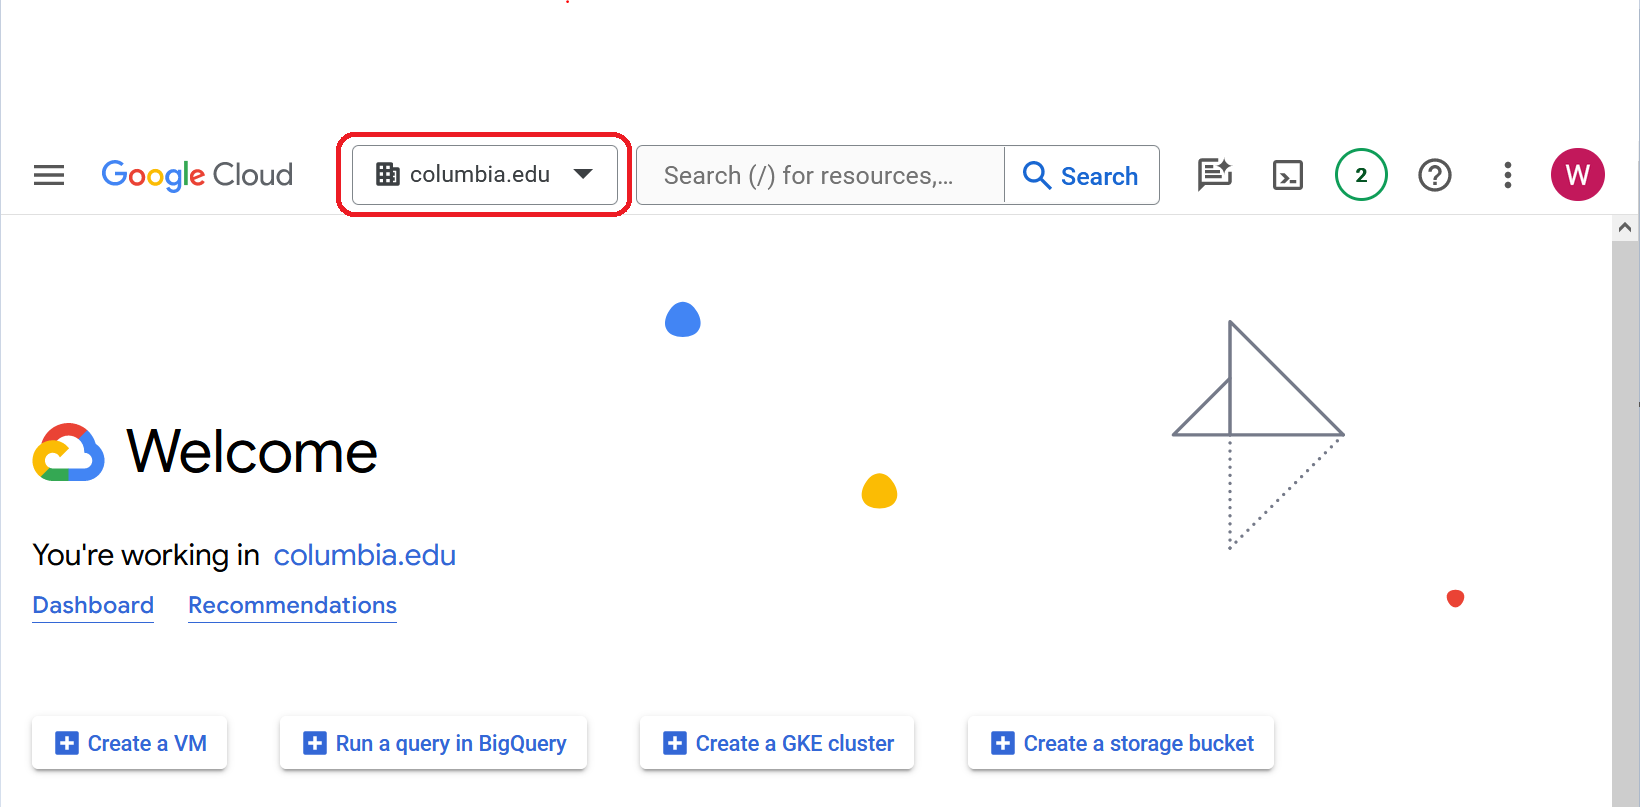

Once opened, click on **NEW PROJECT**

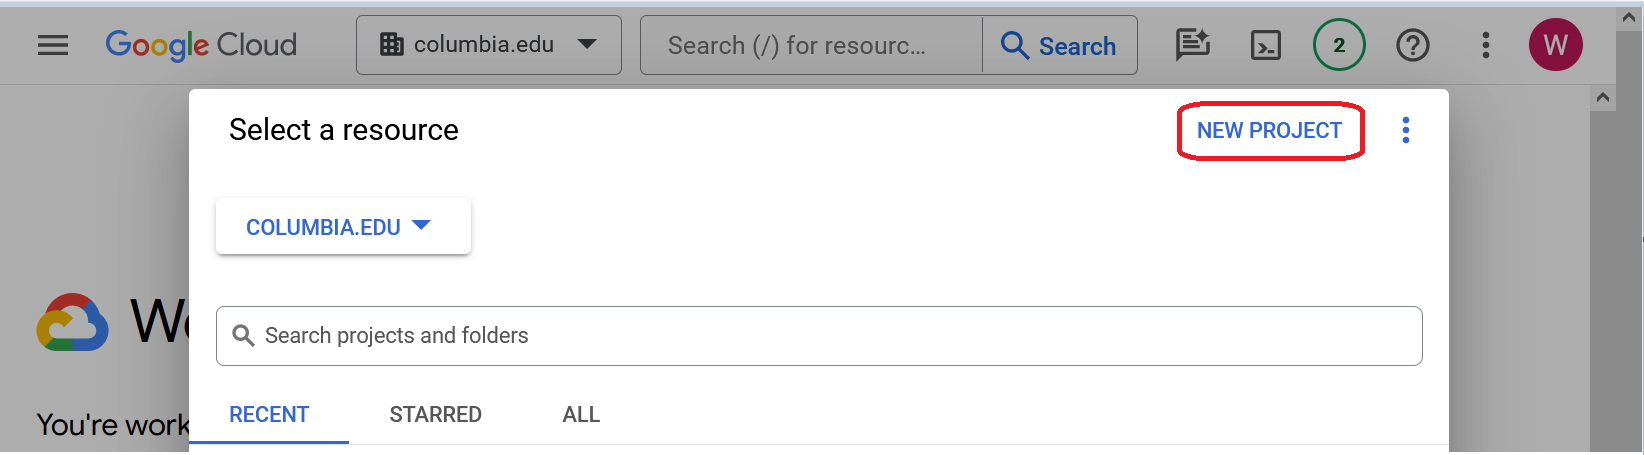

Enter a relevant project name. Click "**Create**".

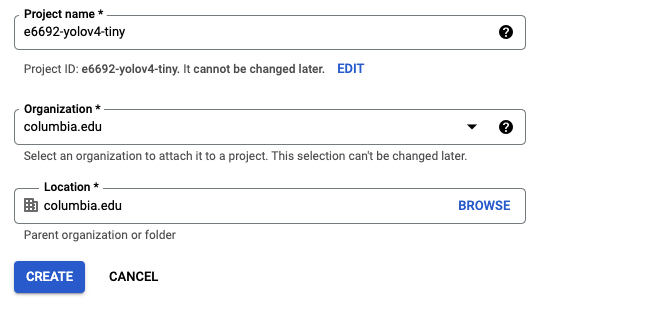

After creating the project, you should see this notification. Click "**SELECT PROJECT**".

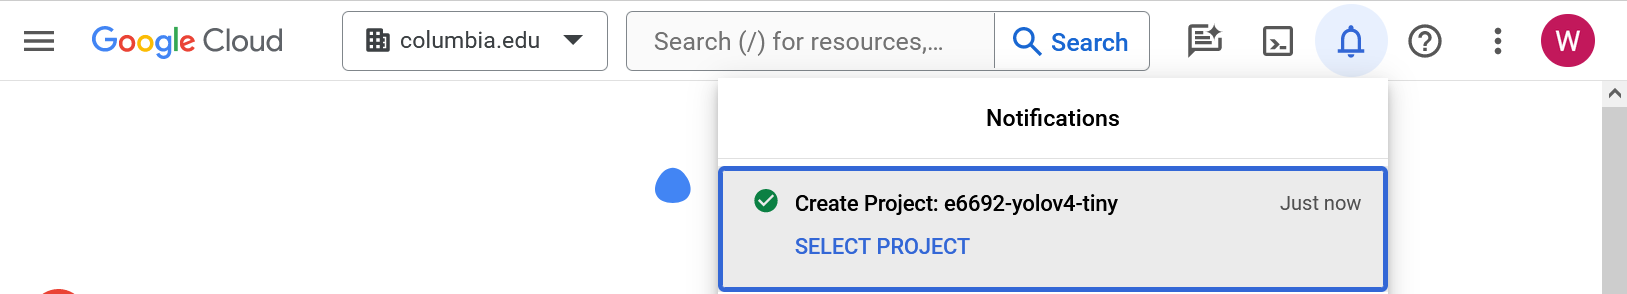

You should now see your project in the top bar:

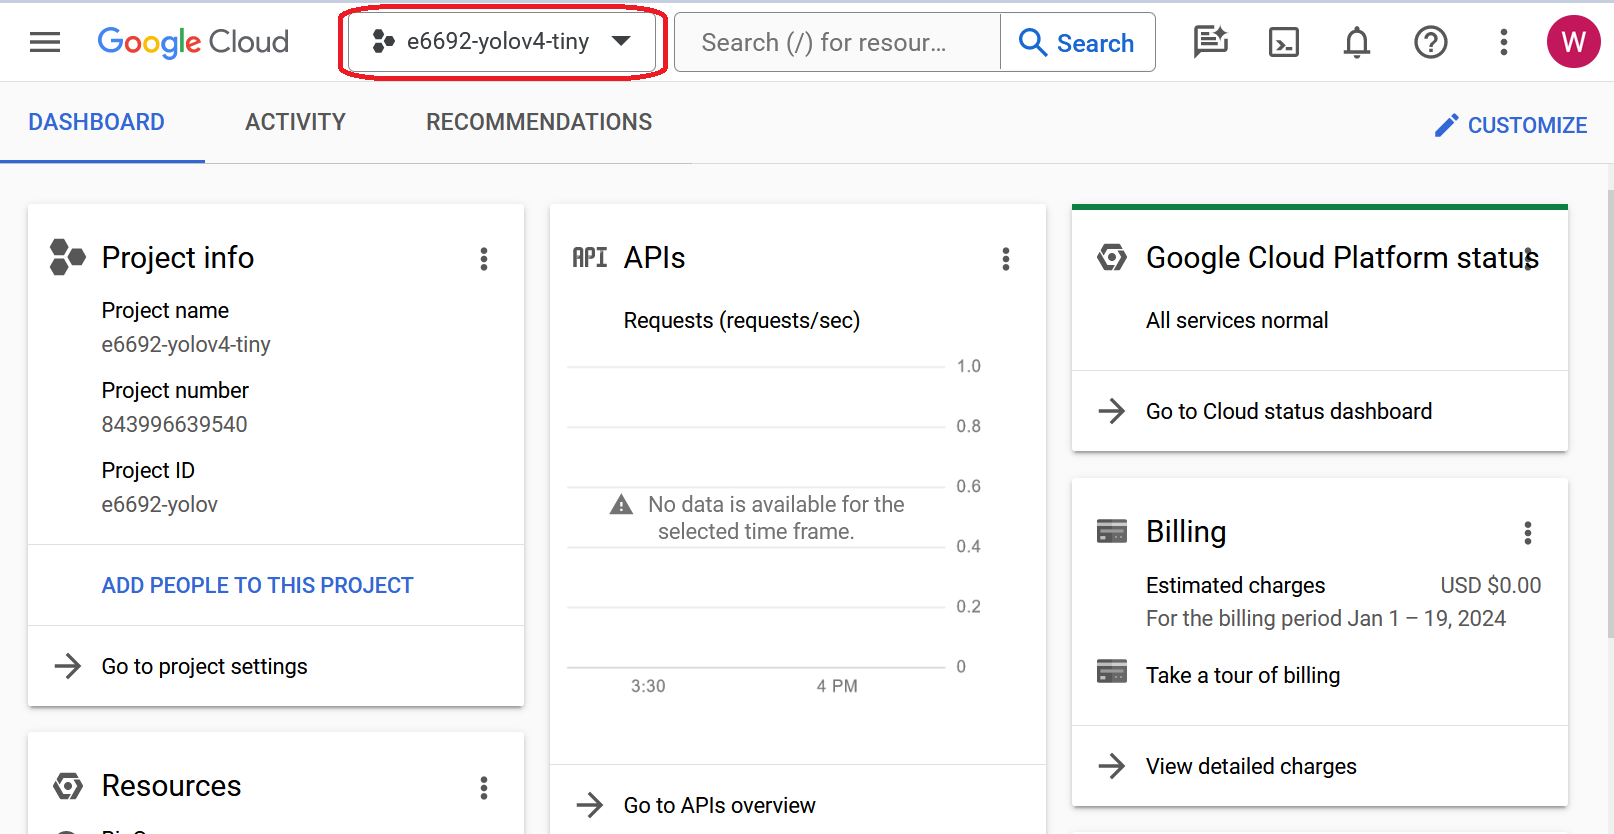


Then, in the side bar options, navigate to "**Compute Engine**" and "**VM instances**".

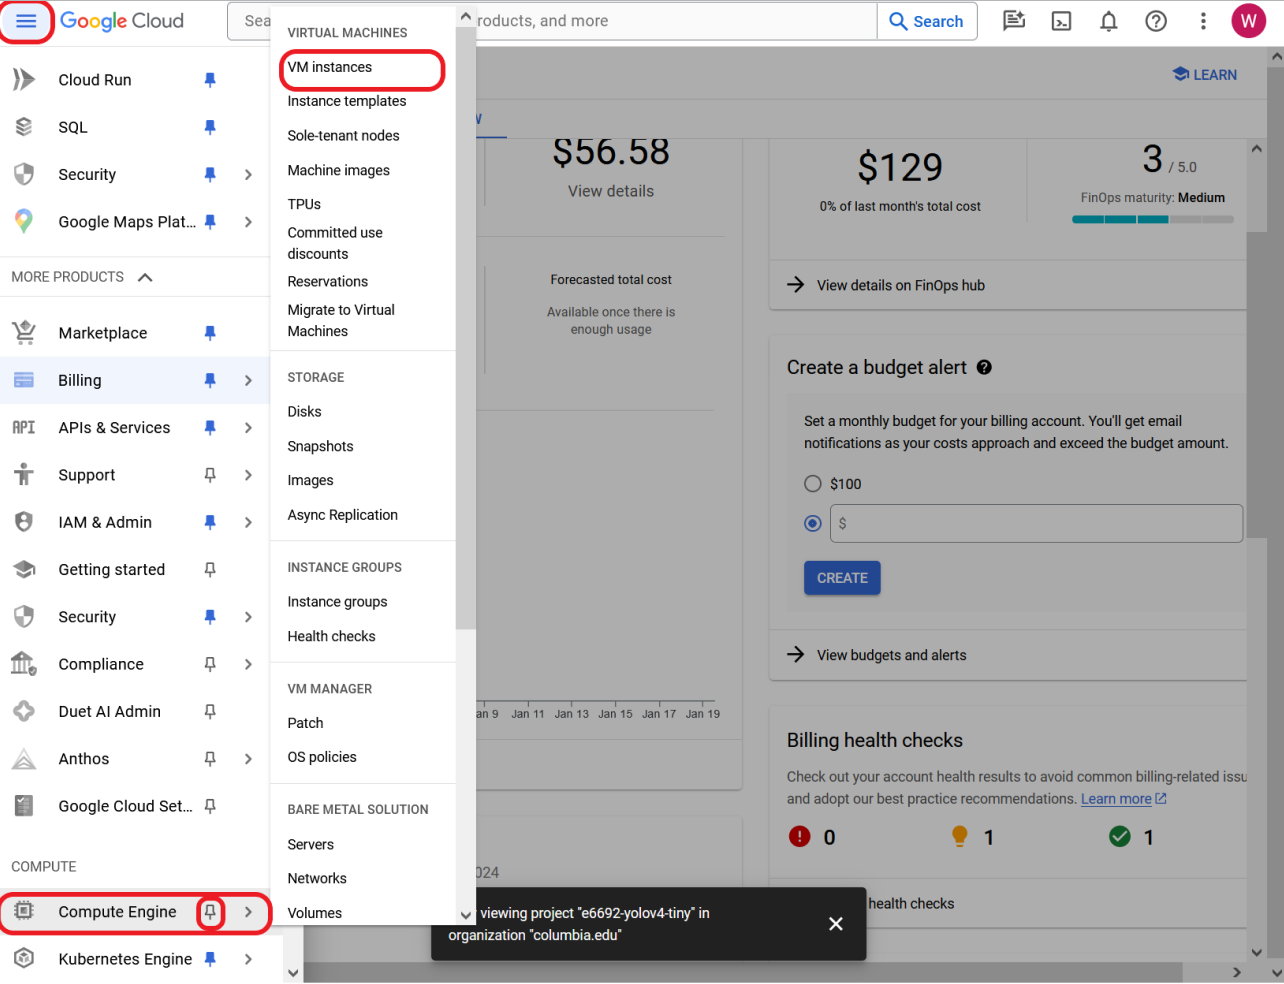

You should see the following screen:

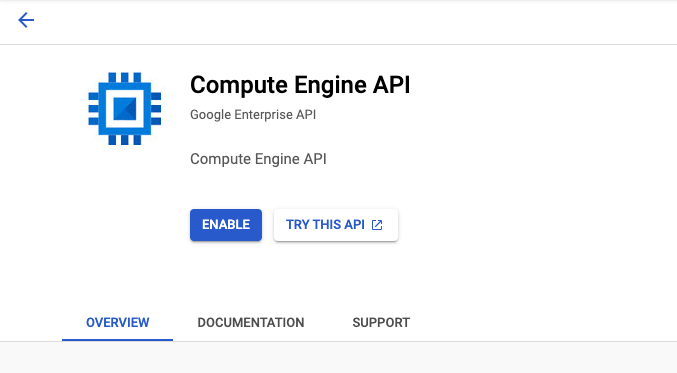

Click "**ENABLE**" to enable the Compute Engine API. It might take a couple minutes for this to complete. When it is enabled you will see the following:

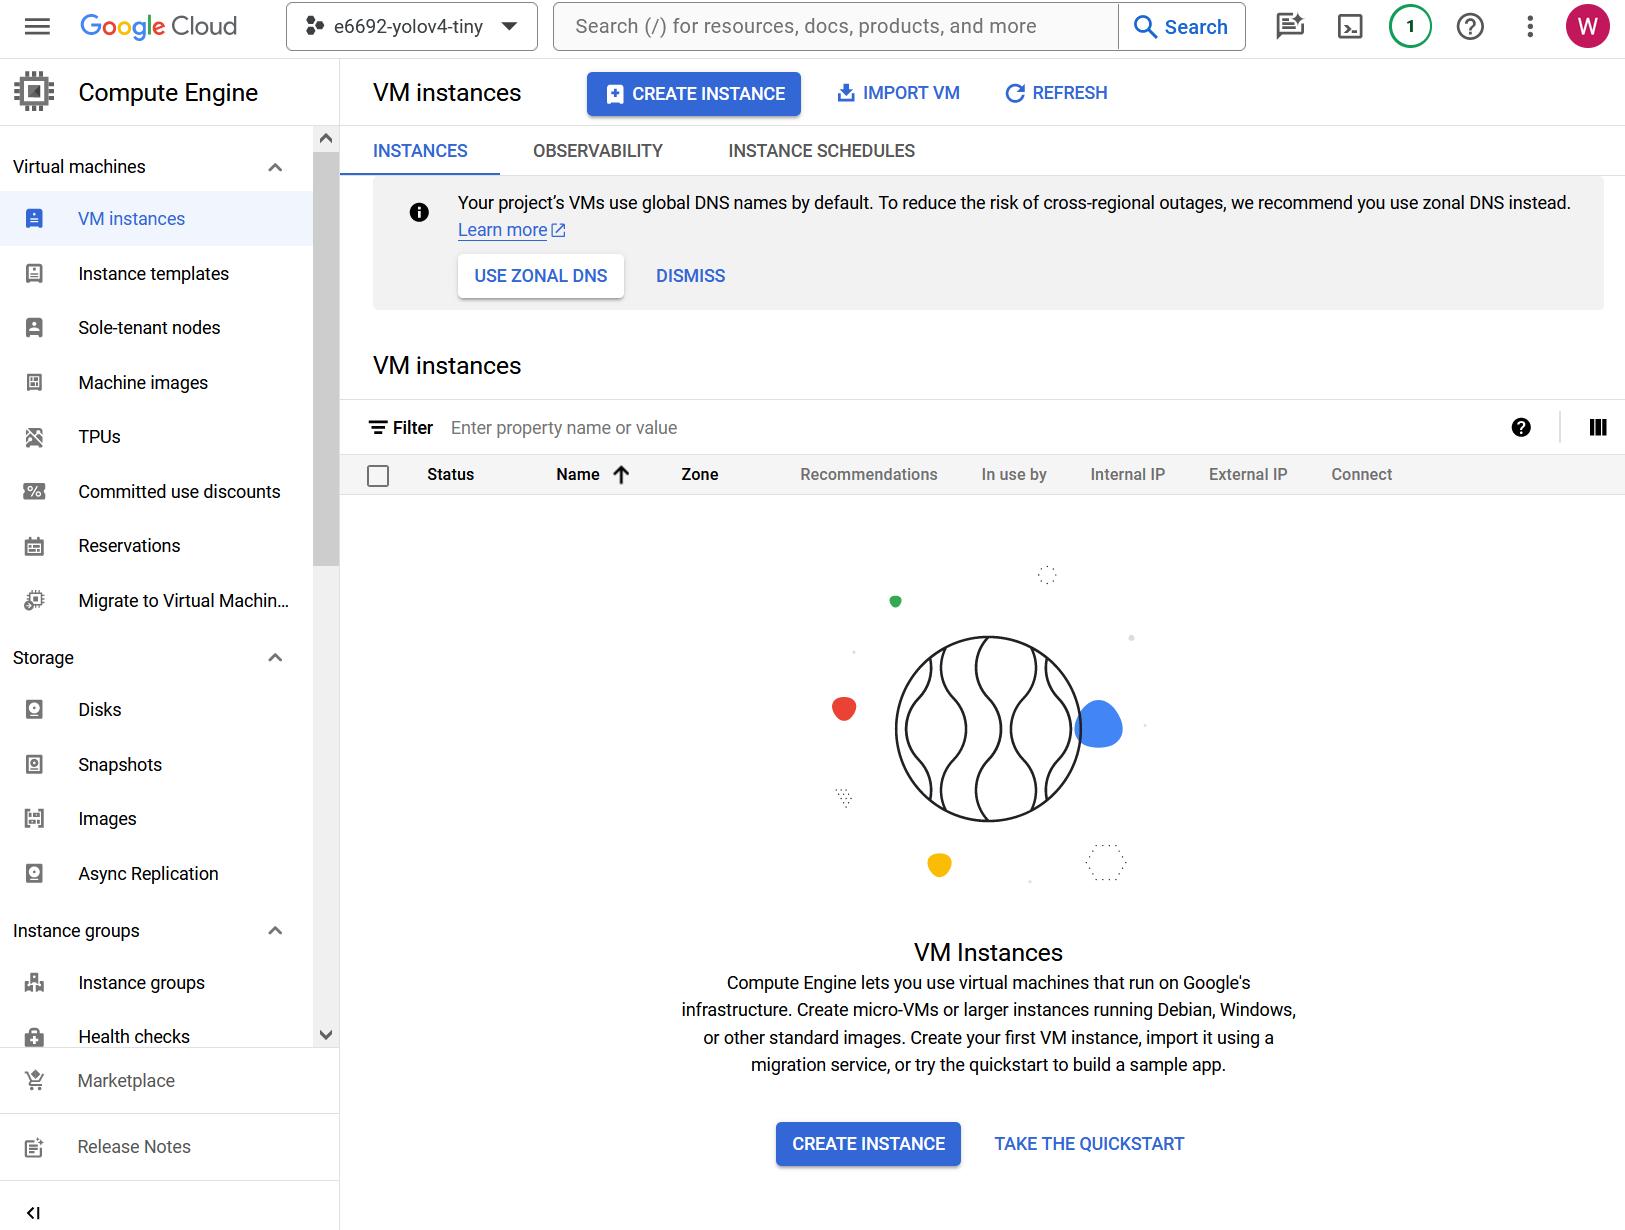

## Step 3: Increase the GPU Quota of Your Project

In order to use a datacenter GPU, you need to increase the GPU quota of your project.

With your new project selected and the Compute Engine API enabled, go to "IAM & Admin" and then "Quotas". 

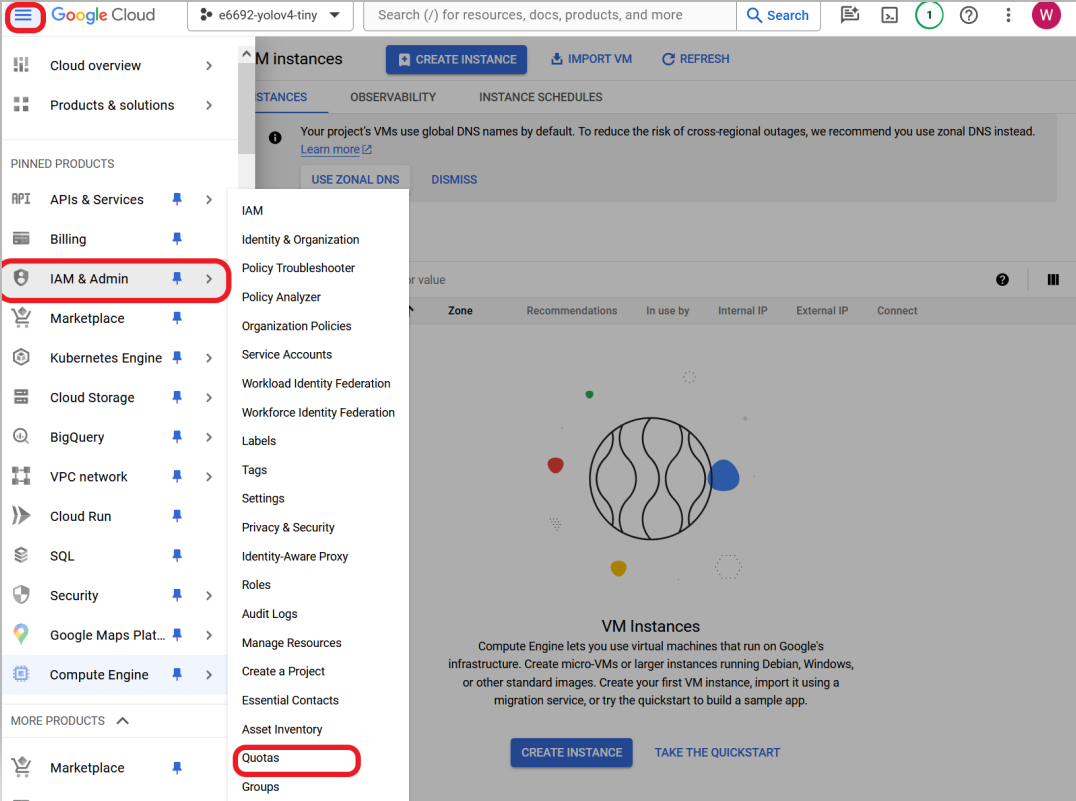

You should see a list of Quotas and Usage. In the search bar type "**gpus_all_regions**". Before hitting enter, select "**compute.googleapis.com/gpus_all_regions**"

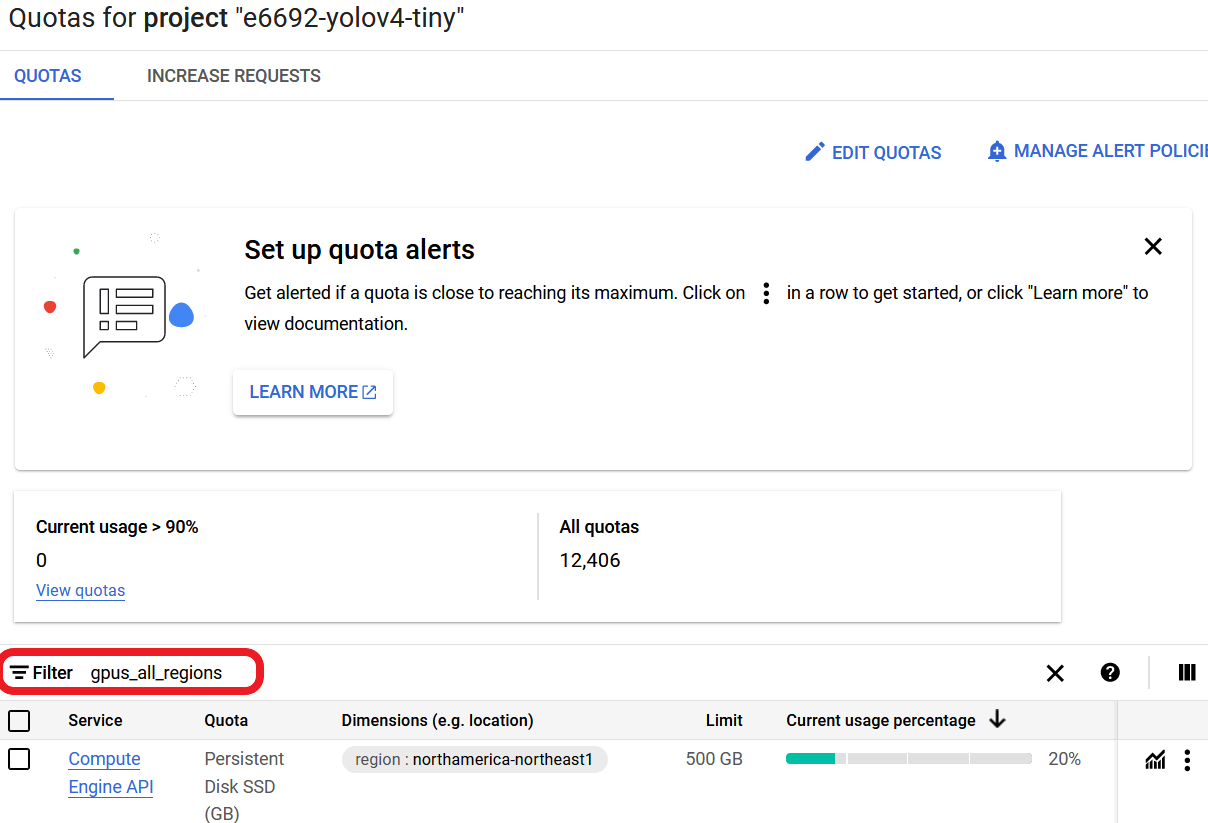

After clicking enter, select the checkbox for "Compute Engine API" "**GPUs (all regions)**". Then select "**EDIT QUOTAS**" in the top bar.

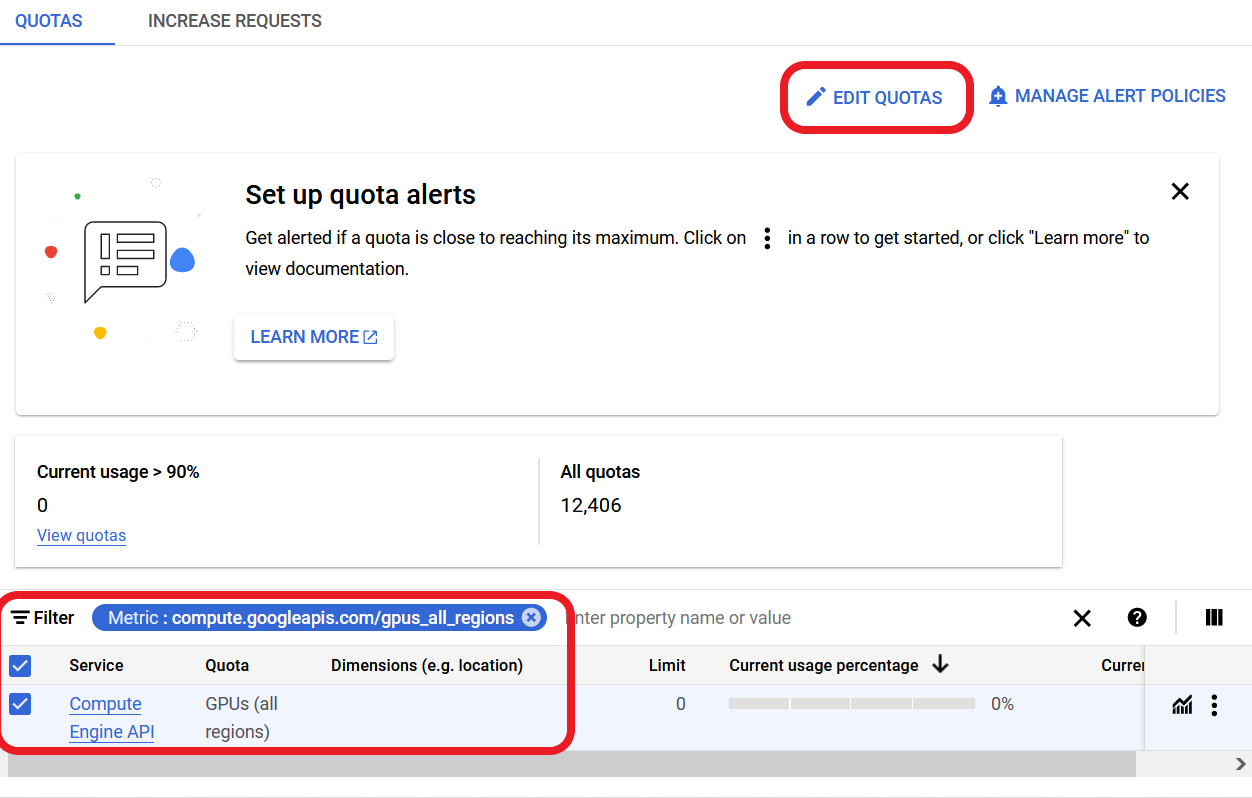


In the popup window, enter "1" as the new limit. This is the number of GPUs you are requesting to use. GCP has to approve this change. In the request description enter something about needing a GPU for a deep learning course. Do not indicate that it is for personal use or your request will likely be denied. 

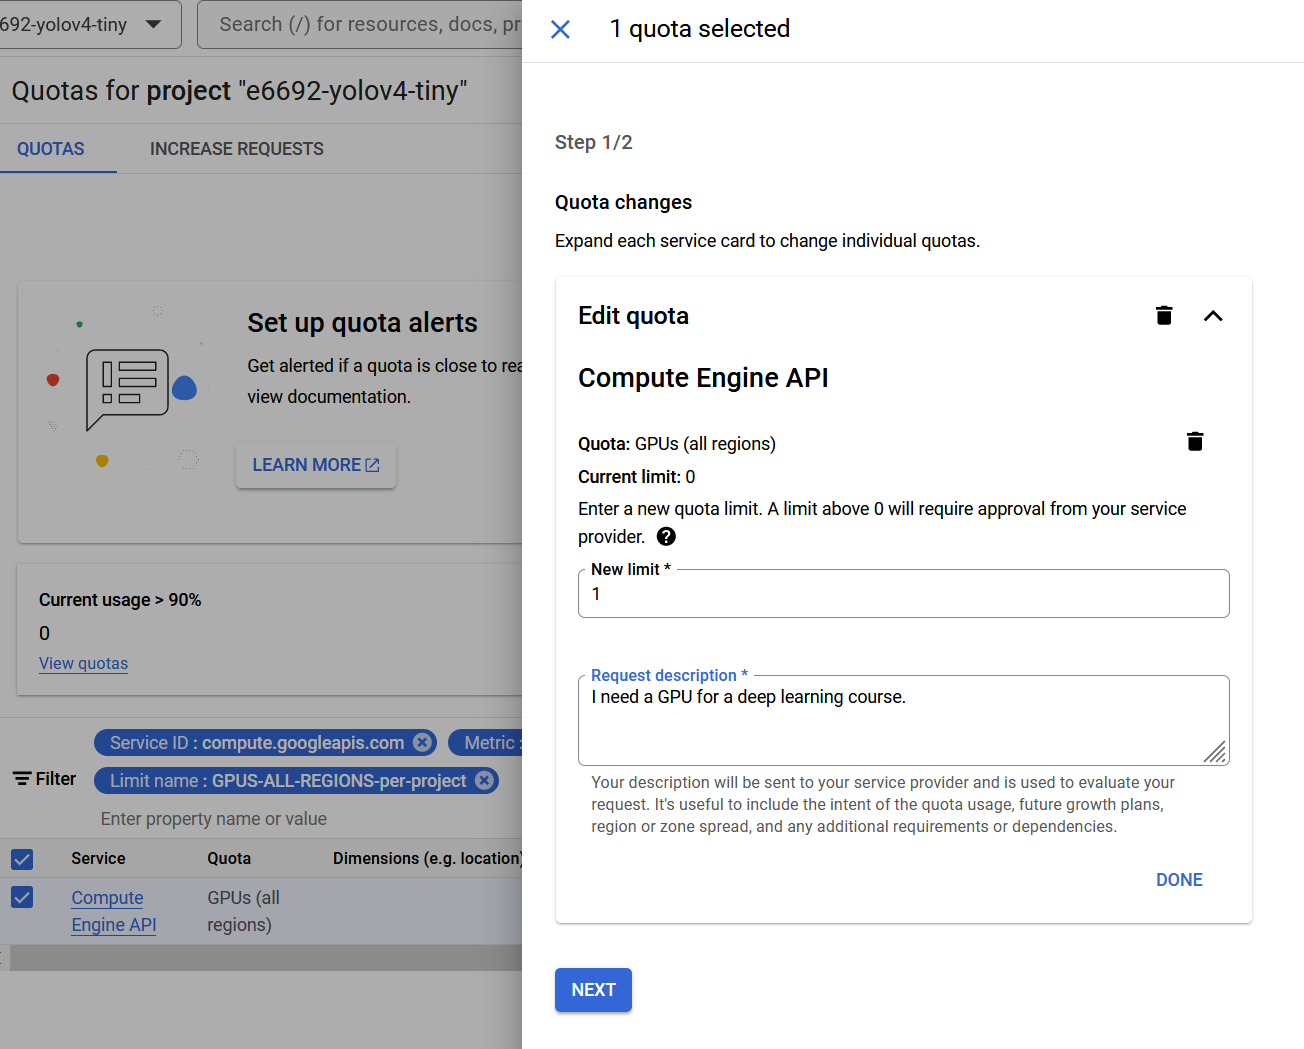

Click "**NEXT**" and enter your personal information. They will use this to contact you when the quota request has been approved (or denied). Submit the request. Go to your email and look for the quota request confirmation. It will look something like this:

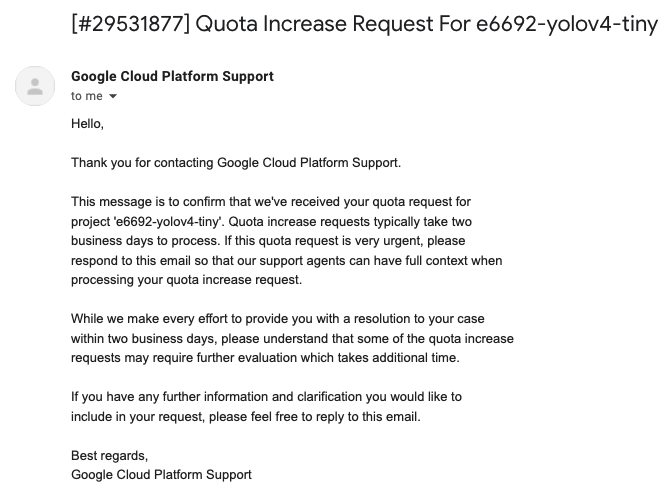

It probably will not take 2 days to process the request, but you should plan for it to take at least 2 days. It took approximately 3 minutes to get approved when making this tutorial. Confirmation email:

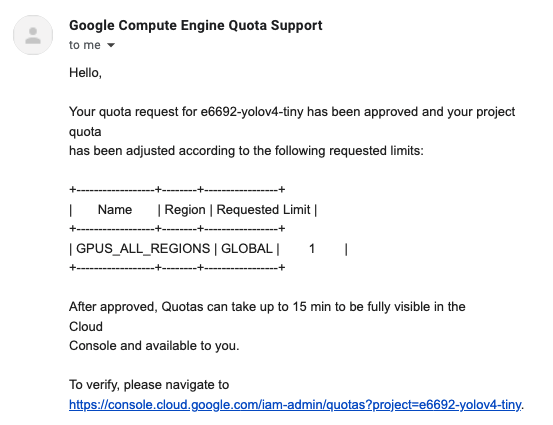

Navigate to the link they provide in the approval email to see the increased quota. Like the email says, it may take 15 minutes to see the changes in GCP, but ultimately it will look like this when the changes propagate: 

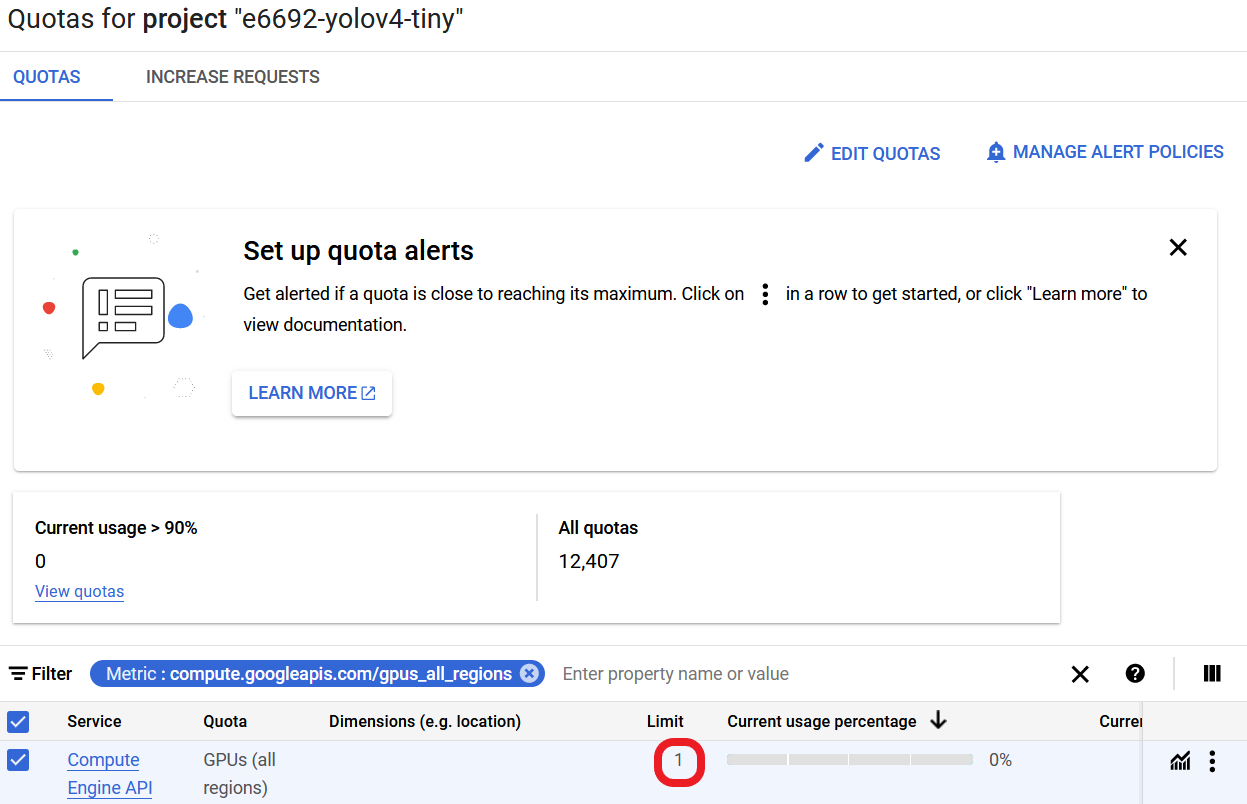

## Step 4: Create a VM Instance

Navigate back to "**Compute Engine**" and "**VM instances**". In the top bar click "**CREATE INSTANCE**".

Name your instance something meaningful, select "**GPU**" as the machine family, and "**NVIDIA T4**" as the GPU type. See [this chart](https://cloud.google.com/compute/docs/gpus) for a breakdown of the available datacenter GPUs.

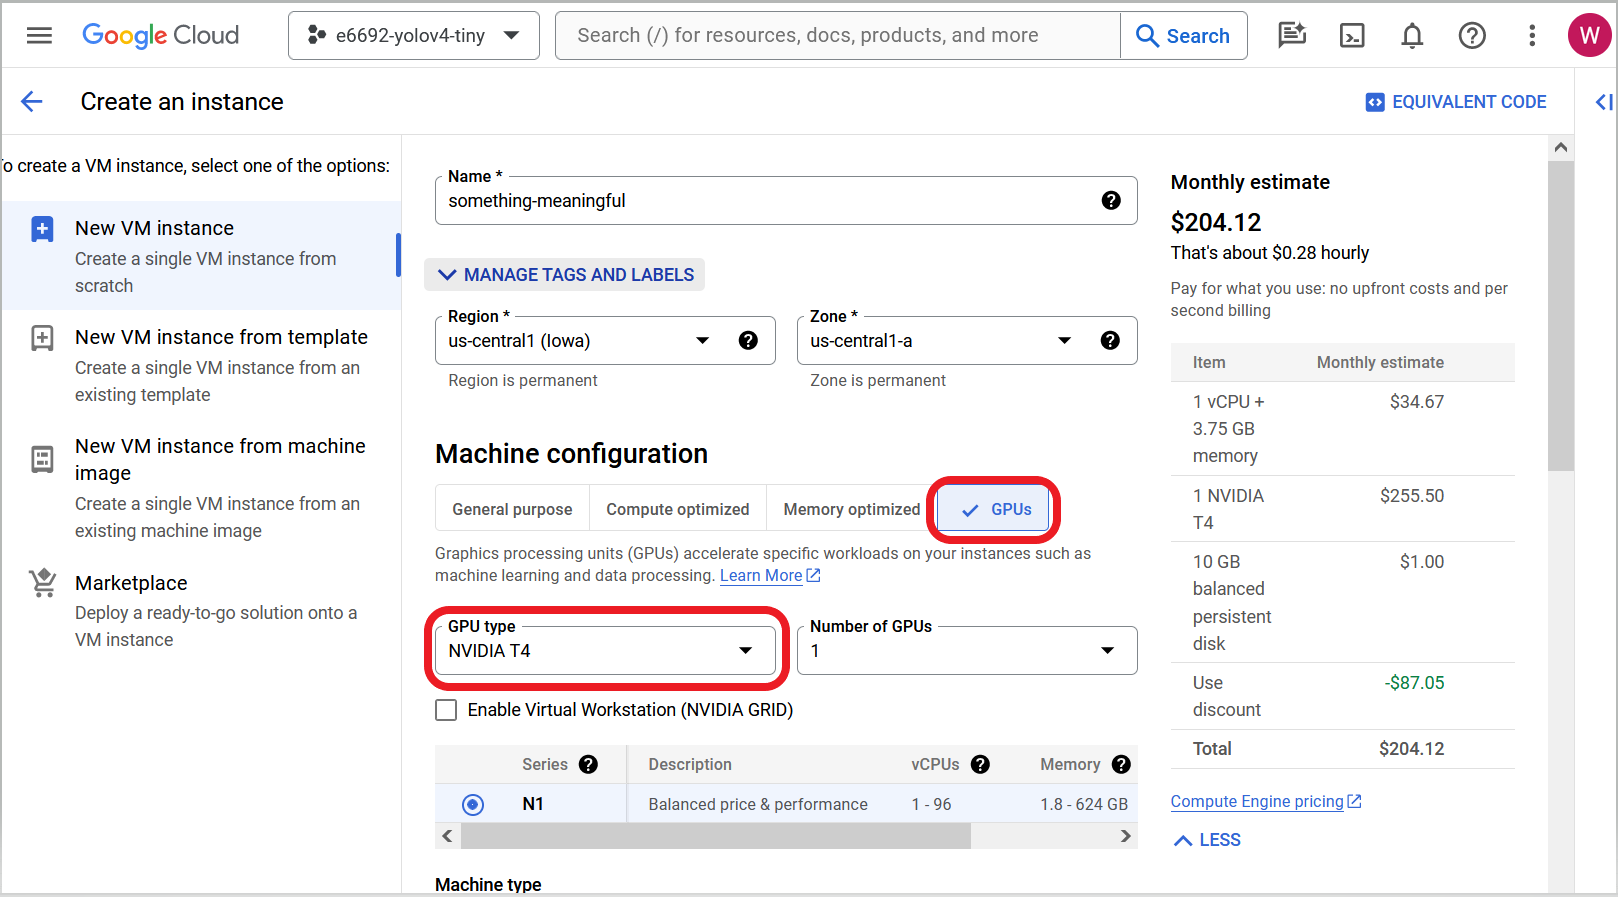


<font color="red"><strong>NOTE:</strong></font>  You may have to adjust the **Region** and **Zone** of your VM depending on available resources. This part requires some trial and error to find an open configuration.

Scroll a bit down untill you see "**Boot disk**", Under "**Boot disk**" click "**CHANGE**".

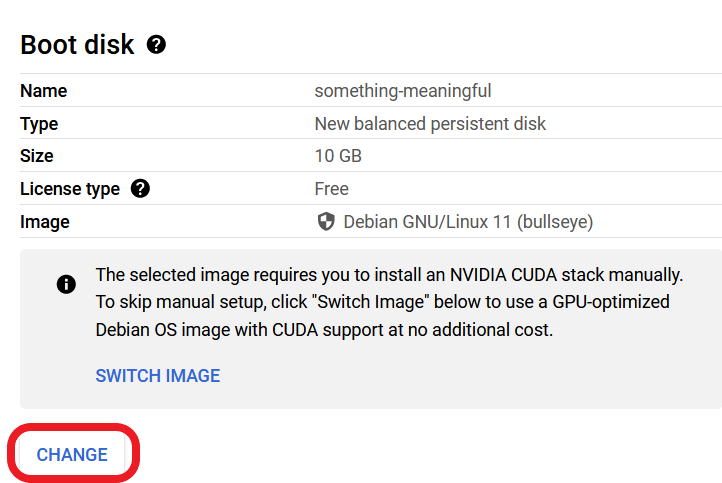

Choose the following boot disk configuration. This boot disk has PyTorch and CUDA preinstalled.

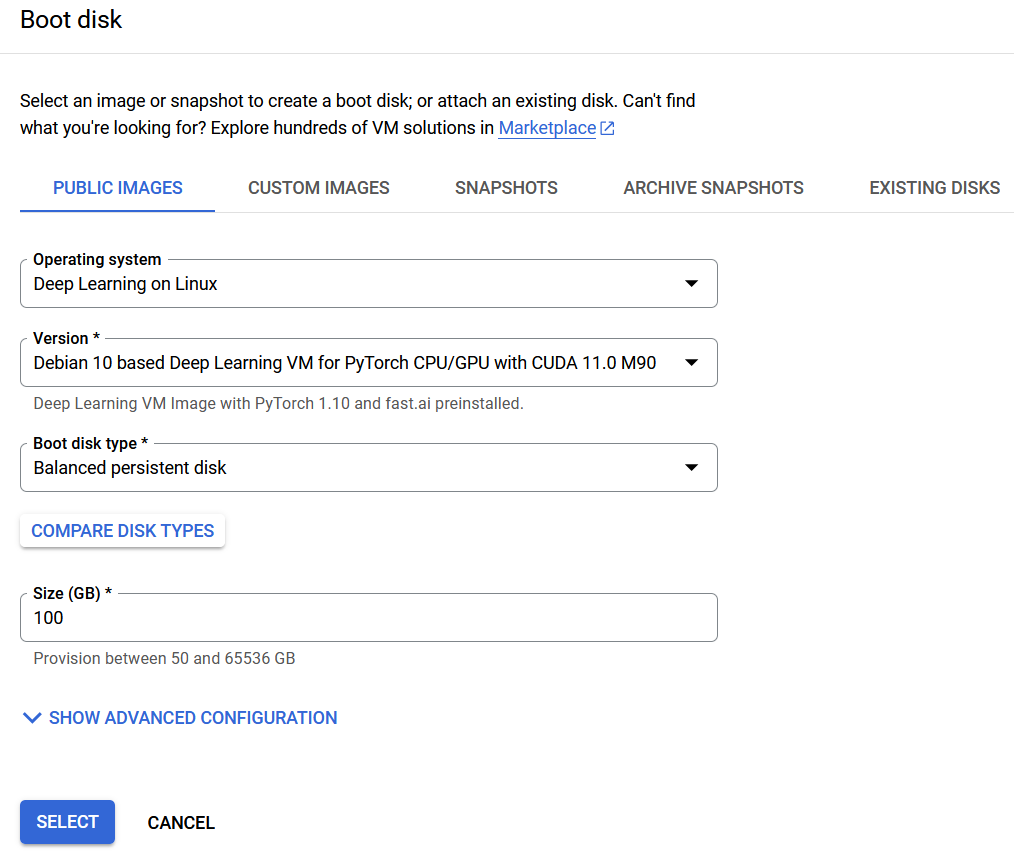

Under "**Firewall**", check both "**Allow HTTP traffic**" and "**Allow HTTPS traffic**".

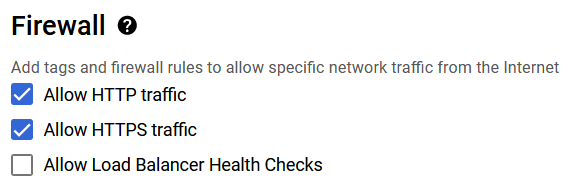

Finally, scroll all the way down and click "**CREATE**".

GCP will now attempt to create your instance. If you see the following notification, you will need to repeat Step 4 with a different region and zone configuration until you find one that is open. (Delete the instance, and start over.)

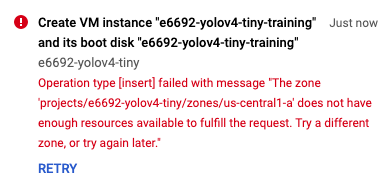

When your instance is created successfully, you will see this:

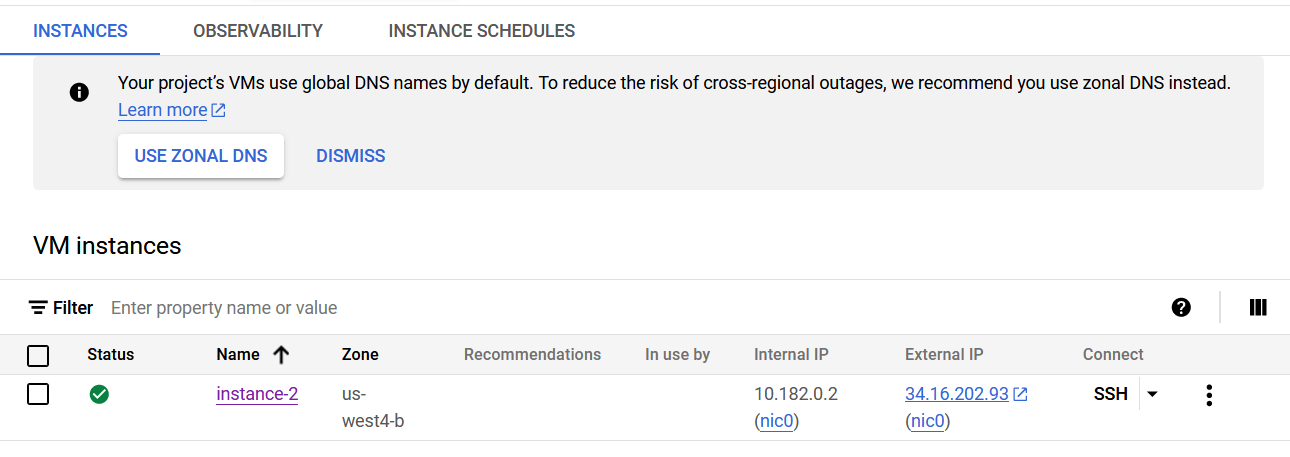

## Step 5: Connect to the VM Instance

To connect to the VM instance we will use SSH.

We're considering two options for SSHing into the instance: the [gcloud CLI](https://cloud.google.com/sdk/gcloud) and the browser based SSH window. We recommend the gcloud CLI method, but it requires some additional setup. However, using the browser based SSH window is just fine. To install gcloud, visit the page in the link and follow the setup instructions. 

To use the browser SSH window click "SSH" under the "Connect" tab of your instance. It will open a new browser window with an SSH connection established.

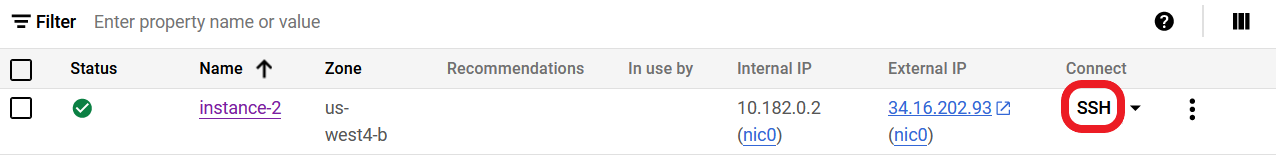

After installing the gcloud CLI (optional), get the gcloud SSH command by clicking the dropdown arrow and clicking "**View gcloud command**".

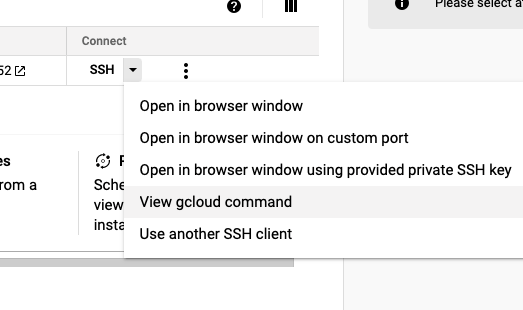

Copy the SSH command to the clipboard and execute it in a local terminal.

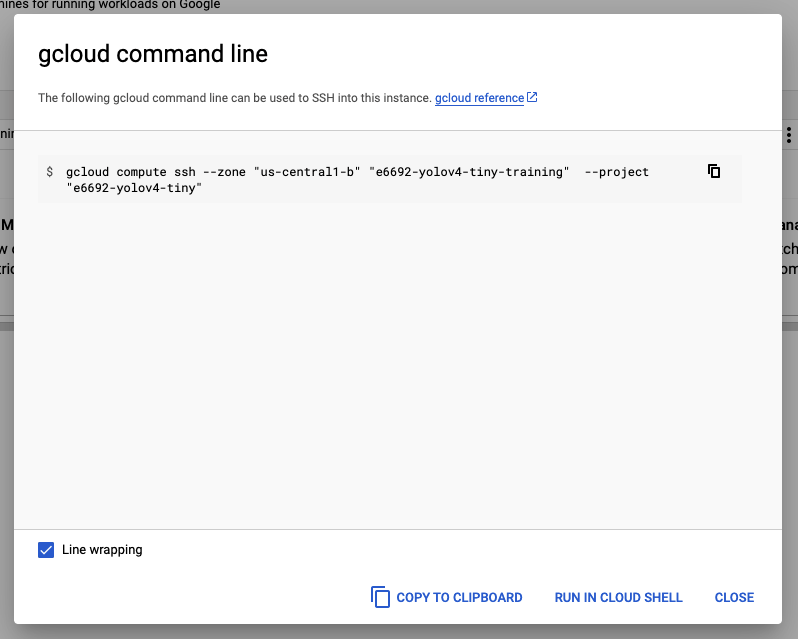

Both connection methods will show this upon successful connection:

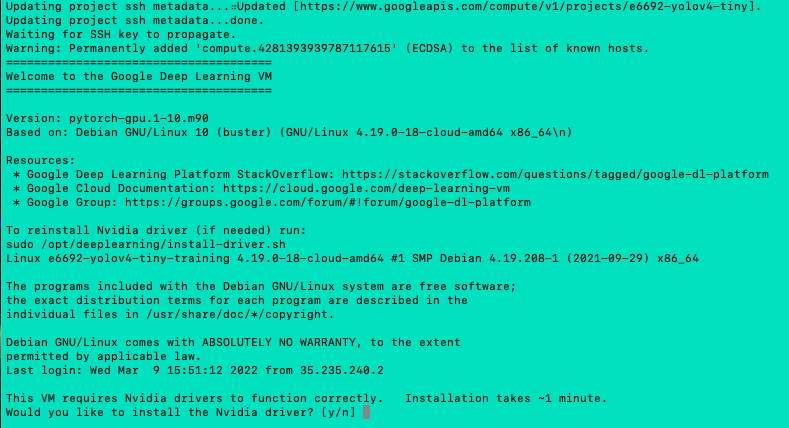

Install the NVIDIA driver (y). If this fails, you may need to restart the VM and try again. When the driver is installed successfully, enter `nvidia-smi`. You will see an output summary of the GPU hardware/software.

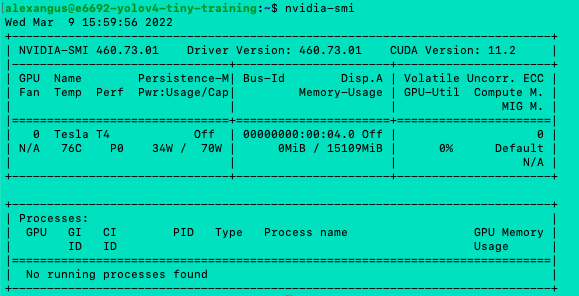 

You can also do an `import torch` in a Python shell to confirm that PyTorch is installed.

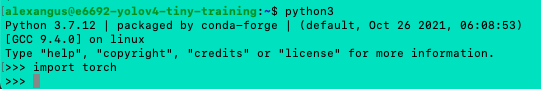

## Step 6: Connect to Jupyter Lab

In order to access the JupyterLab server, we need to create a firewall rule to allow signals to reach the instance. In the GCP console select "VPC network" and "**Firewall**".

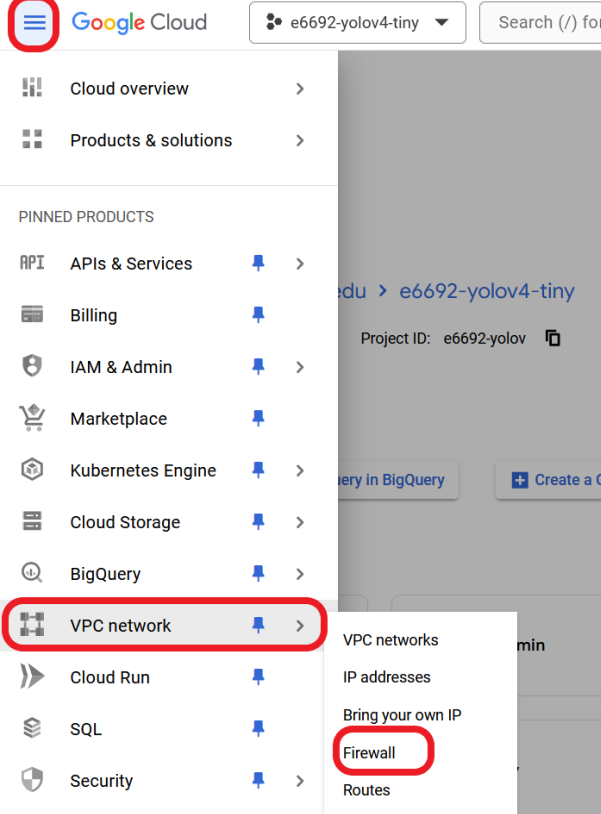

Click "CREATE FIREWALL RULE" 

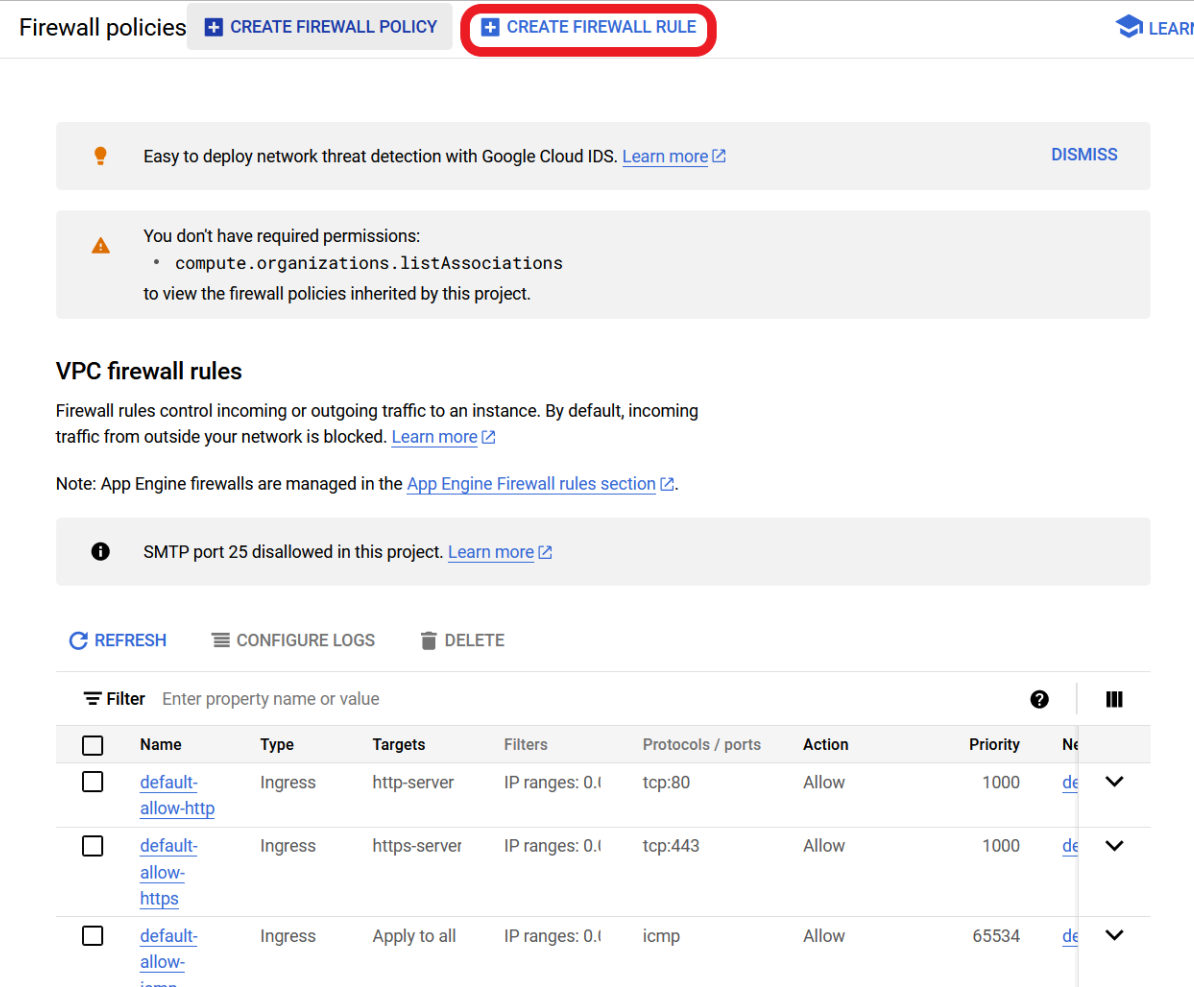

Enter a name for the firewall rule.

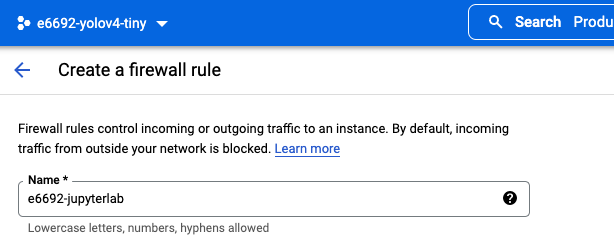

Scroll down untill you see "**Targets**". Select "**All instances in the network**", and under "**Source filter**", select "**IPv4 ranges**", and enter **0.0.0.0/0** in the field below to allow all IP addresses.

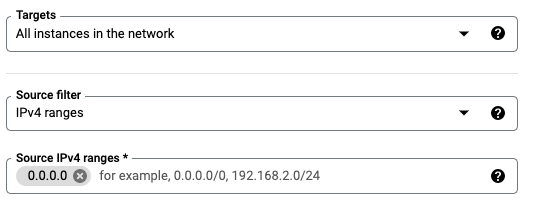

Under **Protocols and ports click**, select "**Specified protocols and ports**" and select "TCP" and enter "8888". This allows us to access the JupyterLab server through port 8888. 

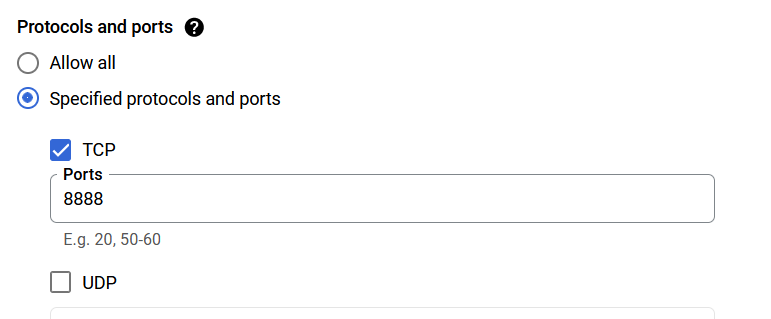

Click "**CREATE**".

You may need to restart your instance to see the changes in the firewall rules. 

Back in the SSH terminal, enter `jupyter lab --allow-root --no-browser --ip 0.0.0.0 --port 8888`. You should see the JupyterLab server start. 

Now go back to the VM instances page of your project. You should see an IP address under "`External IP`". This is the outward facing IP address of the VM instance, and we will use it to connect to the JupyterLab server. Copy the External IP and paste it into your browser with the port 8888 appended: `ip_address:8888`.

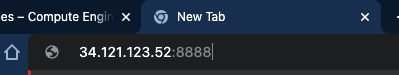

You should see this page. 

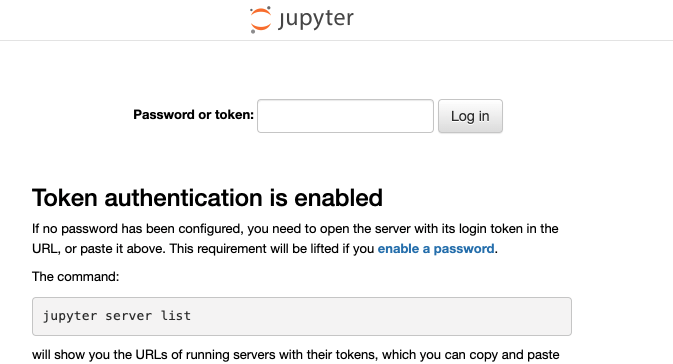

Take the token string from the SSH terminal and paste it in as the password. 

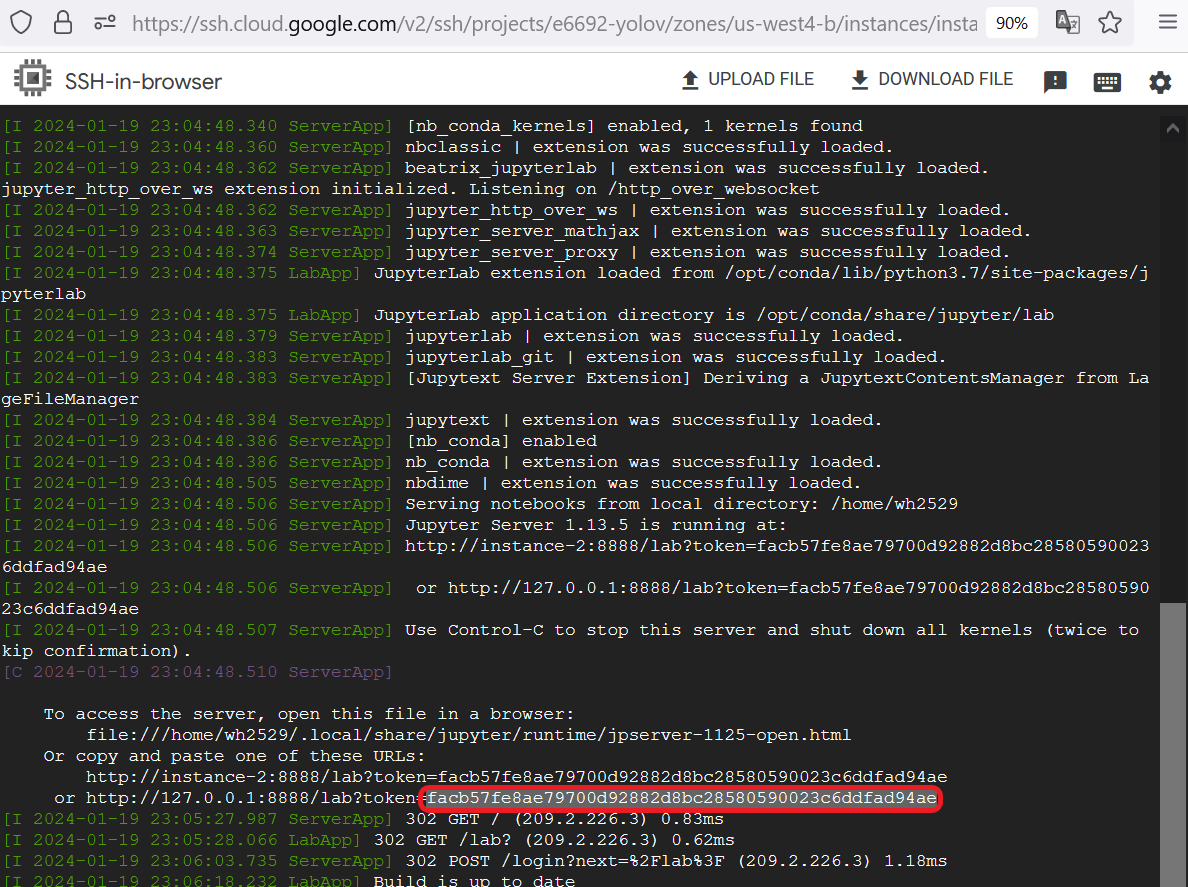

Once you see the JupyterLab interface, the setup is complete.